In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import load_files

In [3]:
path = "J:/Data science/data/NLP/bbc"

In [4]:
data = load_files(path,encoding="utf-8" , decode_error="replace", random_state=1000)

In [6]:
df = pd.DataFrame(list(zip(data['data'], data['target'])), columns=['text', 'label'])

In [7]:
df.head()

,text,label
0,News Corp eyes video games market\n\nNews Corp...,0
1,Wasps 31-37 Leicester\n\nLeicester withstood a...,3
2,Looks and music to drive mobiles\n\nMobile pho...,4
3,'Errors' doomed first Dome sale\n\nThe initial...,2
4,Sculthorpe wants Lions captaincy\n\nPaul Scult...,3


In [8]:
import string
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [9]:
stop_words = nltk.corpus.stopwords.words("english")

In [10]:
lemma_nltk = WordNetLemmatizer()

In [11]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    text = " ".join([lemma_nltk.lemmatize(word) for word in tokens if word not in stop_words])
    return text

In [12]:
df['cleaned_text'] = df['text'].apply(lambda x:clean_text(x))

In [15]:
df.head()

,text,label,cleaned_text
0,News Corp eyes video games market\n\nNews Corp...,0,news corp eye video game market news corp medi...
1,Wasps 31-37 Leicester\n\nLeicester withstood a...,3,wasp 3137 leicester leicester withstood stunni...
2,Looks and music to drive mobiles\n\nMobile pho...,4,look music drive mobile mobile phone still enj...
3,'Errors' doomed first Dome sale\n\nThe initial...,2,error doomed first dome sale initial attempt s...
4,Sculthorpe wants Lions captaincy\n\nPaul Scult...,3,sculthorpe want lion captaincy paul sculthorpe...


In [23]:
df['label'].value_counts()

3    511
0    510
2    417
4    401
1    386
Name: label, dtype: int64

In [24]:
x = df['cleaned_text']

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
matrix_tfidf = tfidf.fit_transform(x)

In [28]:
tfidf.get_feature_names()[:10]

['00', '000', '0001', '00051', '001', '002', '003', '004secs', '007', '01']

In [29]:
print(matrix_tfidf)

  (0, 16905)	0.050059269598134004
  (0, 28370)	0.028953053124349114
  (0, 11933)	0.07110939720684743
  (0, 17845)	0.03690276196808114
  (0, 3933)	0.10989465983322635
  (0, 21131)	0.08871773547000333
  (0, 7579)	0.05761604941330739
  (0, 11103)	0.06985277389119637
  (0, 27701)	0.09765793535533737
  (0, 19338)	0.03479109410434867
  (0, 13906)	0.04501552591165636
  (0, 7336)	0.03633042619055001
  (0, 3995)	0.06711973003792475
  (0, 10303)	0.06762652089881488
  (0, 12506)	0.07110939720684743
  (0, 26591)	0.06869679249898836
  (0, 27207)	0.05378734801982421
  (0, 26744)	0.08484345153188616
  (0, 14481)	0.08401796642865107
  (0, 9246)	0.052646592836268644
  (0, 11659)	0.05969264243874516
  (0, 12315)	0.09250681528151795
  (0, 27818)	0.0329491654825204
  (0, 14272)	0.03859611144652516
  (0, 12362)	0.07110939720684743
  :	:
  (2224, 20927)	0.020386787411414913
  (2224, 23286)	0.11770596988066537
  (2224, 25779)	0.03367857347660637
  (2224, 3359)	0.03148495784686328
  (2224, 29754)	0.0479378293

In [30]:
dataf = pd.DataFrame(matrix_tfidf.toarray())
dataf.head()

,0,1,2,3,4,5,6,7,8,9,...,30538,30539,30540,30541,30542,30543,30544,30545,30546,30547
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.050003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
km_model = KMeans(n_clusters=5)
km_model.fit_transform(matrix_tfidf)

array([[0.97949017, 1.02775639, 0.98885546, 0.99691578, 1.00453841],
       [1.0156534 , 1.0345258 , 1.00326547, 0.97504198, 1.00908365],
       [0.92226898, 1.01907308, 0.98198674, 0.99751925, 0.9916932 ],
       ...,
       [0.94105657, 1.02070831, 0.98470147, 0.9989253 , 0.99042025],
       [1.01659592, 1.04124662, 1.00515369, 1.01048895, 0.96779862],
       [1.01317134, 1.0308442 , 1.0029164 , 0.9888339 , 1.01060823]])

In [37]:
y_pred = km_model.predict(dataf)
y_pred

array([0, 3, 0, ..., 0, 4, 3])

In [35]:
km_model.labels_

array([0, 3, 0, ..., 0, 4, 3])

In [43]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(dataf)
reduced_features

array([[-0.05242701,  0.0408386 ],
       [-0.07935445, -0.11957618],
       [-0.07006639,  0.29757629],
       ...,
       [-0.0593486 ,  0.19549495],
       [-0.09885498, -0.07631862],
       [-0.03827498, -0.06198615]])

In [44]:
km_model.cluster_centers_

array([[0.00000000e+00, 4.58356181e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 8.59682810e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.53621241e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.96515024e-04, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.29271990e-04, 0.00000000e+00, 6.69150820e-04]])

In [45]:
len(km_model.cluster_centers_) , len(km_model.cluster_centers_[0])

(5, 30548)

In [46]:
reduced_cluster_centers = pca.transform(km_model.cluster_centers_)
reduced_cluster_centers

array([[-0.03447677,  0.11424143],
       [ 0.23732749, -0.05245828],
       [ 0.01031575,  0.05401169],
       [-0.0707566 , -0.09760851],
       [-0.07350405, -0.05362879]])

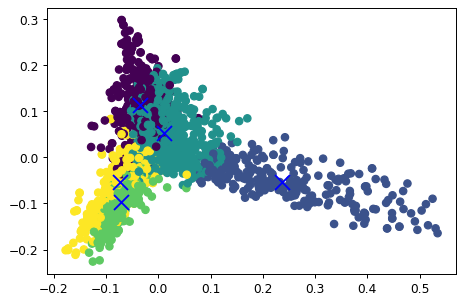

In [50]:
plt.figure(dpi=88)
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=km_model.predict(dataf))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')